In [ ]:
'''
DFS 개념 및 단순 구현

DFS는 깊이 우선 탐색 알고리즘,
특정 경로로 탐색하다가, 특정한 상황에서 최대한 깊숙히 노드를 방문한 후,
다시 돌아가 다른 경로로 탐색하는 알고리즘

<동작 과정>
- 탐색 시작 노드를 스택에 삽입하고 방문 처리함
- 스택의 최상단 노드에 방문하지 않은 인접노드가 있음, 그 인접 노드를 스택에 넣고 방문 처리를 한다.
  방문하지 않은 인접노드가 없으면, 스택에서 최상단 노드를 꺼냄
- 더 이상 수행할 노드가 없을 때까지 반복한다
'''

# 각 노드가 연결된 정보를 리스트 자료형으로 표현 (2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1 , 7],
    [1 , 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1 , 7]
]

visited = [False]*9


def dfs(graph, v, visited):
    # 현재노드를 방문 처리
    visited[v] = True
    print(v, end=' ')

    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]: # visited[i]가 False라면 방문
            dfs(graph, i, visited)

dfs(graph,1, visited)

In [ ]:
'''
BFS

BFS 알고리즘은 '너비 우선 탐색'이라는 의미를 가진다
즉 동 레벨에서 가까운 노드부터 탐색하는 알고리즘으로,
최대한 멀리 있는 노드를 우선으로 탐색하는 DFS와는 다른 방식으로 동작한다.

BFS를 구현에서는 선입선출 방식인 큐 자료구조를 이용하는 것이 정석이다.
인접한 노드를 반복적으로 큐에 넣도록 알고리즘을 작성함을써,
자연스럽게 먼저 들어온 것이 먼저 나가게 되고, 가까운 노드부터 탐색을 수행하게된다.

<BFS 동작 방식>
- 탐색 시작 노드를 큐에 삽입하고 방문 처리를 한다.
- 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문처리
- 더 이상 수행할 수 없을 때까지 반복
'''
from collections import deque

graph = [
    [],
    [2, 3, 8],
    [1 , 7],
    [1 , 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1 , 7]
]

visited = [False]*9

def bfs(graph, start, visited):

    # 시작 노드를 큐에 삽입
    Q = deque([start])
    # 방문처리
    visited[start] = True

    while Q:
        node = Q.popleft()
        print(node, end=' ')

        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[node]:
            if not visited[i]:
                Q.append(i)
                visited[i] = True

bfs(graph,1,visited)

## 음료수 얼려먹기
![음료수.png](../img/음료수얼려먹기.png)

In [ ]:
# 느낌상 BFS로 인접탐색을 하여 얼음의 개수를 탐색해야할듯
# 첫 번재 풀이
from collections import deque

n, m = map(int, input().split())
map_ = [list(map(int, input())) for _ in range(n)]
ans = 0
q = deque()
dx = [1,0,-1,0]
dy = [0,1,0,-1]


for i in range(n):
    for j in range(m):
        if map_[i][j] != 1:
            ans +=1
            map_[i][j] = 1
            q.append((i,j)) # start node 입력

            while q:
                node = q.popleft()
                for x, y in zip(dx, dy):
                    n_x = node[0] + x
                    n_y = node[1] + y

                    if n_x<0 or n_x>=n or n_y<0 or n_y>=m:
                        continue
                    else:
                        if map_[n_x][n_y] == 0 :
                            q.append((n_x,n_y))
                            map_[n_x][n_y] =1

print(ans)



### 정답지 풀이
얼음을 얼릴 수 있는 공간이 상,하,좌,우로 연결되어 있다고 표현할 수 있으므로,
그래프 형태로 모델링 할 수 있다.

어쨋건 문제를 풀려면,
0값의 상,하,좌,우로 연결되어 있는 노드를 묶는 묶음을 찾아야하는데,
이를 dfs로 해결가능함
- 특정한 지점의 주변 상,하,좌,우를 살펴본 뒤에 주변 지점중에서 값이'0'이면서
  아직 방문하지 않은 지점이 있다면 해당 지점을 방문한다.
- 방문한 지점에서 다시 상,하,좌,우를 살펴보면서 방문을 다시 진행하면 연결된 모든 지점 방문 가능
- 위 과정을 모든 노드에 바녹하며 방문하지 않은 지점의 수를 센다


In [ ]:
# 입력 값 받기
n, m = map(int, input().split())
graph = [list(map(int,input().split())) for _ in range(n)]

# DFS로 특정한 노드를 방문한 뒤에 연결된 노드들도 방문
def dfs(x,y):
    if x<=-1 or x>=n or y<=-1 or y>=m:
        return False # 잘못된 위치

    # 아직 방문하지 않은 노드일 경우
    if graph[x][y] ==0 :
        # 해당 노드 방문 처리
        graph[x][y] =1

        # 상, 하 ,좌, 우 재귀로 호출
        dfs(x-1,y)
        dfs(x,y-1)
        dfs(x+1,y)
        dfs(x,y+1)
        return True # 모두 탐색 성공하면 True 반환
    return False # 현재 노노드가 이미 방문한 노드라면 False

result = 0
for i in range(n):
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i,j) == True:
            result +=1

print(result)

## 미로 탈출

![미로탐색.png](../img/미로탐색.png)


In [ ]:
# BFS를 활용하면 쉽게 풀릴듯
from collections import deque

n,m = map(int, input().split())
map_ = [list(map(int, input())) for _ in range(n)]
start = (0,0)
q = deque()

dx = [1,0,-1,0]
dy = [0,1,0,-1]
visited = []  # 방문했던 노드를 체크하는 리스트

q.append(start)

while q:
    node = q.popleft()

    for x, y in zip(dx,dy):
        n_x = node[0] + x
        n_y = node[1] + y

        if (n_x,n_y) in visited:
            continue
        if n_x<=-1 or n_x>=n or n_y<=-1 or n_y>=m:
            continue
        else:
            if map_[n_x][n_y] > 0 :
                map_[n_x][n_y] = map_[n_x][n_y] + map_[node[0]][node[1]]
                q.append((n_x,n_y))
                visited.append((n_x,n_y))


print(map_[n-1][m-1])

### 정답지 풀이

BFS는 시작 지점에서 가까운 노드부터 차례대로 그래프의 모든 노드를 탐색하기 때문에 이러한 미로 탐색 문제는 BFS를 이용하여 풀면 효과적이다, 따라서 (1,1) 지점에서부터 BFS를 수행하여 모든 노드의 값을 거리 정보로 넣으면 된다.

In [8]:
from collections import deque

n,m = map(int, input().split())
graph = [list(map(int, input())) for _ in range(n)]
start = (0,0)

dx = [1,0,-1,0]
dy = [0,1,0,-1]

# BFS 소스코드 구현
def bfs(x,y):
    q = deque()
    q.append((x,y))

    # 큐가 빌 때까지 반복
    while q:
        x,y = q.popleft()
        # 현재 위치에서 네방향으로 위치 확인
        nx = x + dx[i]
        ny = y + dy[i]

        # 미로를 벗어나면 무시
        if nx<=-1 or nx>=n or ny<=-1 or ny>=m:
            continue
        # 벽인 경우 무시
        if graph[nx][ny] ==0:
            continue
        # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
        if graph[nx][ny] ==1 :
            graph[nx][ny] = graph[x][y] +1
            q.append((nx,ny))

    return graph[n-1][m-1]

print(bfs(0,0))

4 6
101111
101010
101011
111011
1


## 특정 거리의 도시 찾기
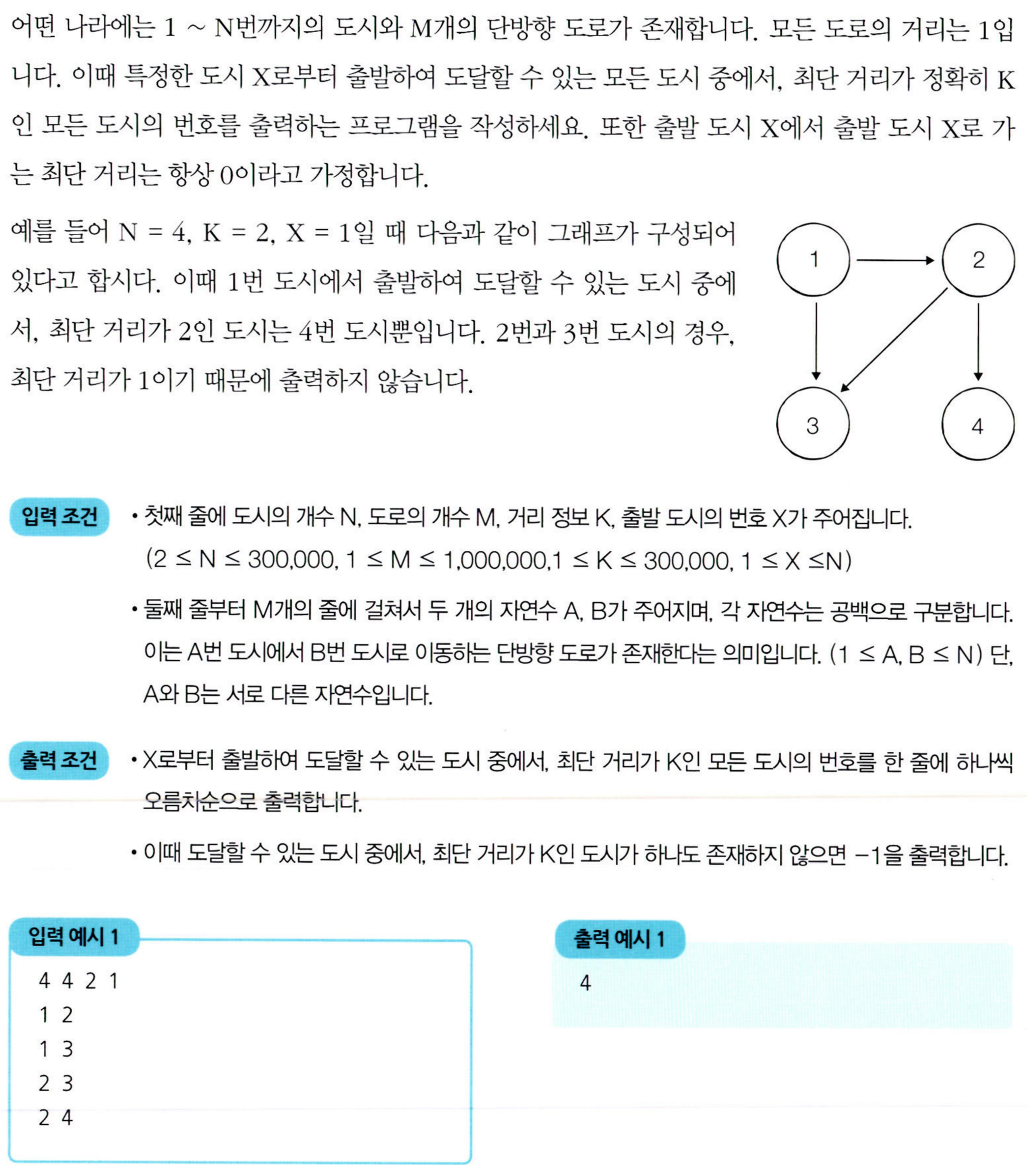

In [16]:
# 최단거리는 어떻게 찾는가-> BFS
# distance 를 체크할 수 있는 리스트 생성 -> 거리를 1씩 더함 
# 모든 도시까지 최단거리 계산 -> 체크해서 k에 해당하는거 출력 
from collections import deque

n, m, k, x = map(int, input().split())
graph = [[] for _ in range(n+1)]
dist = [-1]* (n+1)
dist[x] = 0 # 출발 도시에 대한 거리는 0 

for _ in range(m):
    source, target = map(int,input().split())
    graph[source].append(target)

def bfs(graph,x):
    q = deque([x])
    
    while q: 
        node= q.popleft() 
        for i in graph[node]: 
            # 아직 방문하지 않은 도시라면 
            if dist[i]==-1: 
                dist[i]= dist[node]+1 #방문하고 dist 추가 
                q.append(i)
    
    flag = False 
    for i in range(1,n+1): 
        if dist[i] == k: 
            print(i)
            flag =True 
    if flag==False: 
        print(-1)
            
bfs(graph,x)

4 4 2 1
1 2
1 3
2 3
2 4
4


In [34]:
# 좋은 단어 
n = int(input())
ans = 0 


def stack_(word): 
    stack = [] 
    
    for i,spell in enumerate(list(word)):  
       
        if len(stack) ==0:
            stack.append(spell)
            continue 
 
        if stack[-1]==spell: 
            stack.pop(-1)
        else: 
            stack.append(spell)
            
    if len(stack)==0: 
        return True 
    else: 
        return False 
            

for i in range(n) :
    if stack_(input()):
        ans +=1
    
print(ans)
    

3
ABAB
AABB
ABBA
2


In [41]:
# 파일 합치기 
'''
두 개의 파일을 합칠 떄 필요한 비용이 두파일의 크기의합 
-> 최종적인 한 개의 파일을 완성하는데 필요한 비용의 합은?  
최소 힙 사용하는 느낌 
'''
import heapq 

T = int(input()) 
case = [] 

for i in range(T):
    ch_num = int(input())
    case_  = list(map(int, input().split()))
    case.append((ch_num, case_))

for c in case: 
    ans =0  
    ch_num = c[0]
    h = c[1]
    heapq.heapify(h)
    point = 0 
    for i in range(ch_num-1):
        a = heapq.heappop(h)
        b = heapq.heappop(h)
        new = a+b
        point+=new 
        heapq.heappush(h, new)
    print(point)
        
    
    


1
4
40 30 30 50
300


In [47]:
text = 'PPAPAPP'
new = text.replace('PPAP','P')
print(new)

PAPP


In [10]:
text = input()
while True:
    text = text.replace('PPAP','P')
    if len(text)==4 or len(text)==1:
        if text == "PPAP" or text=='P':
            print("PPAP")
            break
        else: 
            print("NP")
            break

PPAPAPP
NP


'PAPP'